**Machine Learning**
- Predicting the best pricing for real estate in King County


**Conclusion**
- Tuned XGBoost Regression model is very good to predict the house pricing

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [7]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Data Preprocessing**

In [8]:
df.drop(columns=['id'], inplace=True)

In [9]:
def dates(x):
    return x[:8]

df['date'] = df['date'].apply(dates)

In [10]:
df['date'] = df['date'].astype(int)

In [11]:
df.loc[df['yr_renovated']==0, 'yr_renovated'] = df['yr_built']

In [12]:
df = pd.get_dummies(data=df, columns=['zipcode'])

In [13]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,0,0,0,0,0,1,0,0,0
1,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
2,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
4,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
21609,20150223,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,1,0,0,0,0,0,0,0,0,0
21610,20140623,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
21611,20150116,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


**Machine Learning Preprocessing**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop(columns='price')
y = df['price']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .90,random_state = 42)

**Machine Learning**

**Linear Regression**

In [17]:
from sklearn.linear_model import LinearRegression

modelLin = LinearRegression(copy_X=True)
modelLin.fit(X_train, y_train)
modelLin.score(X_test, y_test)
modelLin.predict(X_test)

print('Model Lin Score :',modelLin.score(X_test, y_test))
print('Model Lin Predict :',modelLin.predict(X_test))

Model Lin Score : 0.796955517619208
Model Lin Predict : [ 363201.50732977  825545.66663898 1228351.9250649  ...   63589.92432579
  317914.31986373  267185.22371814]


**Polynomial Regression**

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poli = PolynomialFeatures(degree=2, include_bias = False)
X_poli = poli.fit_transform(X)

X_train_poli, X_test_poli, y_train_poli, y_test_poli = train_test_split(X_poli, y, test_size = .10, random_state = 42)

modelPoli = LinearRegression(copy_X=True)
modelPoli.fit(X_train_poli, y_train_poli)
modelPoli.score(X_test_poli, y_test_poli)
modelPoli.predict(X_test_poli)

print('Model Poli Score :',modelPoli.score(X_test_poli, y_test_poli))
print('Model Poli Predict :',modelPoli.predict(X_test_poli))

Model Poli Score : 0.8593840152883079
Model Poli Predict : [ 377909.25256348  950192.59631348 1248855.97131348 ...  298867.40881348
  304518.65881348  306314.98693848]


**LogReg** (tdk dipakai, lemot)

In [19]:
# from sklearn.linear_model import LogisticRegression

# modelLog = LogisticRegression()
# modelLog.fit(X_train, y_train)
# modelLog.score(X_train, y_train)
# modelLog.predict(X_test)


# print('Model Log Score :',modelLog.score(X_test, y_test))
# print('Model Log Predict :',modelLog.predict(X_test))

**KNN**

In [20]:
from sklearn.neighbors import KNeighborsRegressor

modelKNN = KNeighborsRegressor()
modelKNN.fit(X_train, y_train)
modelKNN.score(X_train, y_train)
modelKNN.predict(X_test)

print('Model KNN Score :',modelKNN.score(X_test, y_test))
print('Model KNN Predict :',modelKNN.predict(X_test))

Model KNN Score : 0.5119566136366014
Model KNN Predict : [ 408198.  779700. 1163950. ...  787800.  421900.  254800.]


**Lasso**

In [21]:
from sklearn.linear_model import Lasso

modelLasso = Lasso(copy_X=True)
modelLasso.fit(X_train, y_train)
modelLasso.score(X_train, y_train)
modelLasso.predict(X_test)


print('Model Lasso Score :',modelLasso.score(X_test, y_test))
print('Model Lasso Predict :',modelLasso.predict(X_test))

Model Lasso Score : 0.7969469564468864
Model Lasso Predict : [ 363193.27238622  825297.19402963 1228578.83075148 ...   63355.86899203
  317966.37764367  267150.97457059]


**Ridge**

In [22]:
from sklearn.linear_model import Ridge

modelRidge = Ridge(copy_X=True)
modelRidge.fit(X_train, y_train)
modelRidge.score(X_train, y_train)
modelRidge.predict(X_test)


print('Model Ridge Score :',modelRidge.score(X_test, y_test))
print('Model Ridge Predict :',modelRidge.predict(X_test))

Model Ridge Score : 0.7969910658155861
Model Ridge Predict : [ 363519.72579175  824448.46407194 1229232.70557873 ...   63692.86829205
  317911.11851081  267314.8783666 ]


**Elastic Net**

In [23]:
from sklearn.linear_model import ElasticNet

modelEN = ElasticNet(copy_X=True)
modelEN.fit(X_train, y_train)
modelEN.score(X_train, y_train)
modelEN.predict(X_test)


print('Model ElasticNet Score :',modelEN.score(X_test, y_test))
print('Model ElasticNet Predict :',modelEN.predict(X_test))

Model ElasticNet Score : 0.6084848263215801
Model ElasticNet Predict : [ 512422.34633678  707274.5388999  1183540.88867015 ...  246662.65606569
  391814.4950781   306935.1885623 ]


**RF**

In [24]:
from sklearn.ensemble import RandomForestRegressor

modelRF = RandomForestRegressor()
modelRF.fit(X_train, y_train)
modelRF.score(X_train, y_train)
modelRF.predict(X_test)

print('Model RF Score :',modelRF.score(X_test, y_test))
print('Model RF Predict :',modelRF.predict(X_test))

Model RF Score : 0.8818498175539766
Model RF Predict : [ 389602.    858200.7  1095786.53 ...  331956.86  290099.5   286477.5 ]


**XGBoost**

In [25]:
from xgboost import XGBRegressor
from sklearn.svm import SVC, SVR
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

modelXGB = XGBRegressor()
modelXGB.fit(X_train, y_train)
modelXGB.score(X_train, y_train)
modelXGB.predict(X_test)

print('Model XGB Score :',modelXGB.score(X_test, y_test))
print('Model XGB Predict :',modelXGB.predict(X_test))

Model XGB Score : 0.8981044834807838
Model XGB Predict : [ 397089.94  888527.56 1128538.5  ...  365266.53  269836.78  275406.6 ]


**Metrics**

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
y_pred_lintr = modelLin.predict(X_train)
y_pred_politr = modelPoli.predict(X_train_poli)
y_pred_knntr = modelKNN.predict(X_train)
y_pred_lassotr = modelLasso.predict(X_train)
y_pred_ridgetr = modelRidge.predict(X_train)
y_pred_ENtr = modelEN.predict(X_train)
y_pred_RFtr = modelRF.predict(X_train)
y_pred_XGBtr = modelXGB.predict(X_train)

MAE_Lin = mean_absolute_error(y_train,y_pred_lintr)
MAE_Poli = mean_absolute_error(y_train_poli,y_pred_politr)
MAE_KNN = mean_absolute_error(y_train,y_pred_knntr)
MAE_Lasso = mean_absolute_error(y_train,y_pred_lassotr)
MAE_Ridge = mean_absolute_error(y_train,y_pred_ridgetr)
MAE_EN = mean_absolute_error(y_train,y_pred_ENtr)
MAE_RF = mean_absolute_error(y_train,y_pred_RFtr)
MAE_XGB = mean_absolute_error(y_train,y_pred_XGBtr)

MSE_Lin = mean_squared_error(y_train, y_pred_lintr)
MSE_Poli = mean_squared_error(y_train_poli, y_pred_politr)
MSE_KNN = mean_squared_error(y_train, y_pred_knntr)
MSE_Lasso = mean_squared_error(y_train, y_pred_lassotr)
MSE_Ridge = mean_squared_error(y_train, y_pred_ridgetr)
MSE_EN = mean_squared_error(y_train, y_pred_ENtr)
MSE_RF = mean_squared_error(y_train, y_pred_RFtr)
MSE_XGB = mean_squared_error(y_train, y_pred_XGBtr)

RMSE_Lin = np.sqrt(MSE_Lin)
RMSE_Poli = np.sqrt(MSE_Poli)
RMSE_KNN = np.sqrt(MSE_KNN)
RMSE_Lasso = np.sqrt(MSE_Lasso)
RMSE_Ridge = np.sqrt(MSE_Ridge)
RMSE_EN = np.sqrt(MSE_EN)
RMSE_RF = np.sqrt(MSE_RF)
RMSE_XGB = np.sqrt(MSE_XGB)

R2_Lin = r2_score(y_train, y_pred_lintr)
R2_Poli = r2_score(y_train_poli, y_pred_politr)
R2_KNN = r2_score(y_train, y_pred_knntr)
R2_Lasso = r2_score(y_train, y_pred_lassotr)
R2_Ridge = r2_score(y_train, y_pred_ridgetr)
R2_EN = r2_score(y_train, y_pred_ENtr)
R2_RF = r2_score(y_train, y_pred_RFtr)
R2_XGB = r2_score(y_train, y_pred_XGBtr)

y_pred_lintest = modelLin.predict(X_test)
y_pred_politest = modelPoli.predict(X_test_poli)
y_pred_knntest = modelKNN.predict(X_test)
y_pred_lassotest = modelLasso.predict(X_test)
y_pred_ridgetest = modelRidge.predict(X_test)
y_pred_ENtest = modelEN.predict(X_test)
y_pred_RFtest = modelRF.predict(X_test)
y_pred_XGBtest = modelXGB.predict(X_test)

MAE_Lintest = mean_absolute_error(y_test,y_pred_lintest)
MAE_Politest = mean_absolute_error(y_test_poli,y_pred_politest)
MAE_KNNtest = mean_absolute_error(y_test,y_pred_knntest)
MAE_Lassotest = mean_absolute_error(y_test,y_pred_lassotest)
MAE_Ridgetest = mean_absolute_error(y_test,y_pred_ridgetest)
MAE_ENtest = mean_absolute_error(y_test,y_pred_ENtest)
MAE_RFtest = mean_absolute_error(y_test,y_pred_RFtest)
MAE_XGBtest = mean_absolute_error(y_test,y_pred_XGBtest)

MSE_Lintest = mean_squared_error(y_test, y_pred_lintest)
MSE_Politest = mean_squared_error(y_test_poli, y_pred_politest)
MSE_KNNtest = mean_squared_error(y_test, y_pred_knntest)
MSE_Lassotest = mean_squared_error(y_test, y_pred_lassotest)
MSE_Ridgetest = mean_squared_error(y_test, y_pred_ridgetest)
MSE_ENtest = mean_squared_error(y_test, y_pred_ENtest)
MSE_RFtest = mean_squared_error(y_test, y_pred_RFtest)
MSE_XGBtest = mean_squared_error(y_test, y_pred_XGBtest)

RMSE_Lintest = np.sqrt(MSE_Lintest)
RMSE_Politest = np.sqrt(MSE_Politest)
RMSE_KNNtest = np.sqrt(MSE_KNNtest)
RMSE_Lassotest = np.sqrt(MSE_Lassotest)
RMSE_Ridgetest = np.sqrt(MSE_Ridgetest)
RMSE_ENtest = np.sqrt(MSE_ENtest)
RMSE_RFtest = np.sqrt(MSE_RFtest)
RMSE_XGBtest = np.sqrt(MSE_XGBtest)

R2_Lintest = r2_score(y_test, y_pred_lintest)
R2_Politest = r2_score(y_test_poli, y_pred_politest)
R2_KNNtest = r2_score(y_test, y_pred_knntest)
R2_Lassotest = r2_score(y_test, y_pred_lassotest)
R2_Ridgetest = r2_score(y_test, y_pred_ridgetest)
R2_ENtest = r2_score(y_test, y_pred_ENtest)
R2_RFtest = r2_score(y_test, y_pred_RFtest)
R2_XGBtest = r2_score(y_test, y_pred_XGBtest)

In [28]:
data = {
    "Linreg Training" : [MAE_Lin, MSE_Lin, RMSE_Lin, R2_Lin],
    "Linreg Test" : [MAE_Lintest, MSE_Lintest, RMSE_Lintest, R2_Lintest],
    "Polyreg Training" : [MAE_Poli, MSE_Poli, RMSE_Poli, R2_Poli],
    "Polyreg Test" : [MAE_Politest, MSE_Politest, RMSE_Politest, R2_Politest],
    "KNN Training" : [MAE_KNN, MSE_KNN, RMSE_KNN, R2_KNN],
    "KNN Test" : [MAE_KNNtest, MSE_KNNtest, RMSE_KNNtest, R2_KNNtest],
    "Lasso Training" : [MAE_Lasso, MSE_Lasso, RMSE_Lasso, R2_Lasso],
    "Lasso Test" : [MAE_Lassotest, MSE_Lassotest, RMSE_Lassotest, R2_Lassotest],
    "Ridge Training" : [MAE_Ridge, MSE_Ridge, RMSE_Ridge, R2_Ridge],
    "Ridge Test" : [MAE_Ridgetest, MSE_Ridgetest, RMSE_Ridgetest, R2_Ridgetest],
    "EN Training" : [MAE_EN, MSE_EN, RMSE_EN, R2_EN],
    "EN Test" : [MAE_ENtest, MSE_ENtest, RMSE_ENtest, R2_ENtest],
    "RF Training" : [MAE_RF, MSE_RF, RMSE_RF, R2_RF],
    "RF Test" : [MAE_RFtest, MSE_RFtest, RMSE_RFtest, R2_RFtest],
    "XGB Training" : [MAE_XGB, MSE_XGB, RMSE_XGB, R2_XGB],
    "XGB Test" : [MAE_XGBtest, MSE_XGBtest, RMSE_XGBtest, R2_XGBtest]
}
pd.DataFrame(data=data, index=['MAE', 'MSE', 'RMSE', 'R2'])

,Linreg Training,Linreg Test,Polyreg Training,Polyreg Test,KNN Training,KNN Test,Lasso Training,Lasso Test,Ridge Training,Ridge Test,EN Training,EN Test,RF Training,RF Test,XGB Training,XGB Test
MAE,9.480224e+04,9.889474e+04,6.777670e+04,7.925705e+04,1.308828e+05,1.653922e+05,9.480532e+04,9.890335e+04,9.480790e+04,9.895278e+04,1.423673e+05,1.480497e+05,2.497721e+04,7.081937e+04,4.077032e+04,6.698285e+04
MSE,2.521377e+10,2.957933e+10,1.159734e+10,2.048481e+10,4.536964e+10,7.109772e+10,2.521382e+10,2.958058e+10,2.521676e+10,2.957416e+10,4.947927e+10,5.703557e+10,2.244423e+09,1.721201e+10,3.255662e+09,1.484405e+10
RMSE,1.587885e+05,1.719864e+05,1.076909e+05,1.431251e+05,2.130015e+05,2.666415e+05,1.587886e+05,1.719901e+05,1.587978e+05,1.719714e+05,2.224394e+05,2.388212e+05,4.737534e+04,1.311946e+05,5.705841e+04,1.218361e+05
R2,8.112074e-01,7.969555e-01,9.131629e-01,8.593840e-01,6.602868e-01,5.119566e-01,8.112071e-01,7.969470e-01,8.111851e-01,7.969911e-01,6.295153e-01,6.084848e-01,9.831945e-01,8.818498e-01,9.756227e-01,8.981045e-01


**Hyperparameter Tuning**

In [29]:
Param_LR = {
    "fit_intercept" : [True]
}

Param_PR = {
    "fit_intercept" : [True,False]
}

Param_KNN = {
    "n_neighbors" : [1,5,15,33],
    "weights" : ["distance","uniform"],
    "leaf_size" : [1,3,7]
}

Param_Lasso = {
    "alpha" : [1.0,2.0],
    "fit_intercept" : [True,False],
    "normalize" : [True, False],
#     "precompute" : [True, False],
    "copy_X" : [True],
#     "max_iter" : [1000, 100000],
#     "tol" : [0.0001],
#     "warm_start" : [False],
#     "positive" : [False]
}

Param_Ridge = {
    "alpha" : [1.0,2.0],
    "fit_intercept" : [True,False],
    "normalize" : [True, False],
#     "precompute" : [True, False],
    "copy_X" : [True],
#     "max_iter" : [1000, 100000],
#     "tol" : [0.0001]
}

Param_EN = {
    "alpha" : [1.0],
    "l1_ratio" : [0.2, 0.5, 0.8],
    "fit_intercept" : [True],
    "normalize" : [True, False],
#     "precompute" : [False],
#     "max_iter" : [1000],
    "copy_X" : [True],
#     "tol" : [0.0001],
#     "warm_start" : [False],
#     "positive" : [False]
}

Param_RF = {
    "n_estimators" : [20,50,100],
    #"max_depth" : [8],
    "min_samples_split" : [2,5,15,30],
    "min_samples_leaf" : [1,2,5]
}

Param_XGB = {
    "max_depth" : [4],
    "learning_rate" : [0.3],
    "n_estimators" : [500],
#     "gamma" : [2, 10],
#     "colsample_bytree" : [0.2, 0.9],
#     "subsample" : [0.2, 0.9],
#     "reg_alpha" : [1],
#     "reg_lambda" : [1]
}

In [30]:
from sklearn.model_selection import GridSearchCV

**Model 1**

In [31]:
model_tuned_1 = GridSearchCV(estimator=modelLin, param_grid=Param_LR, cv = 3, n_jobs=-1, verbose=1, scoring='r2')

model_tuned_1.fit(X_train, y_train)
model_tuned_1.best_score_
model_tuned_1_1 = model_tuned_1.best_estimator_
y_tune_1_train = model_tuned_1_1.predict(X_train)
y_tune_1_test = model_tuned_1_1.predict(X_test)

R2_LRtrain = r2_score(y_train, y_tune_1_train)
R2_LRtest = r2_score(y_test, y_tune_1_test)

print('Best Score :',model_tuned_1.best_score_)
print('Tuned R2 LinReg Train : ', R2_LRtrain)
print('Tuned R2 LinReg Test : ', R2_LRtest)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.8s finished


Best Score : 0.8067340929386462
Tuned R2 LinReg Train :  0.8112074259983655
Tuned R2 LinReg Test :  0.796955517619208


**Model 1_Poli**

In [32]:
model_tuned_1_poli = GridSearchCV(estimator=modelPoli, param_grid=Param_PR, cv = 3, n_jobs=-1, verbose=1, scoring='r2')

model_tuned_1_poli.fit(X_train_poli, y_train_poli)
model_tuned_1_poli.best_score_
model_tuned_1_1_poli = model_tuned_1_poli.best_estimator_
y_tune_1_poli_train = model_tuned_1_1_poli.predict(X_train_poli)
y_tune_1_poli_test = model_tuned_1_1_poli.predict(X_test_poli)

R2_PRtrain = r2_score(y_train_poli, y_tune_1_poli_train)
R2_PRtest = r2_score(y_test_poli, y_tune_1_poli_test)

print('Best Score :',model_tuned_1_poli.best_score_)
print('Tuned R2 PoliReg Train : ', R2_PRtrain)
print('Tuned R2 PoliReg Test : ', R2_PRtest)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:  2.0min remaining:  4.0min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  2.1min finished


Best Score : 0.8318011753428528
Tuned R2 PoliReg Train :  0.9131628663372079
Tuned R2 PoliReg Test :  0.8593840152883079


**Model 2**

In [33]:
model_tuned_2 = GridSearchCV(estimator=modelKNN, param_grid=Param_KNN, cv = 3, n_jobs=-1, verbose=1, scoring='r2')

model_tuned_2.fit(X_train, y_train)
model_tuned_2.best_score_
model_tuned_2_1 = model_tuned_2.best_estimator_
y_tune_2_train = model_tuned_2_1.predict(X_train)
y_tune_2_test = model_tuned_2_1.predict(X_test)

R2_KNNtrain = r2_score(y_train, y_tune_2_train)
R2_KNNtest = r2_score(y_test, y_tune_2_test)

print('Best Score :',model_tuned_2.best_score_)
print('Tuned R2 KNN Train : ', R2_KNNtrain)
print('Tuned R2 KNN Test : ', R2_KNNtest)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   29.6s finished


Best Score : 0.4733755384948741
Tuned R2 KNN Train :  1.0
Tuned R2 KNN Test :  0.5229359986275419


**Model 3**

In [34]:
model_tuned_3 = GridSearchCV(estimator=modelLasso, param_grid=Param_Lasso, cv = 3, n_jobs=-1, verbose=1, scoring='r2')

model_tuned_3.fit(X_train, y_train)
model_tuned_3.best_score_
model_tuned_3_1 = model_tuned_3.best_estimator_
y_tune_3_train = model_tuned_3_1.predict(X_train)
y_tune_3_test = model_tuned_3_1.predict(X_test)

R2_Lassotrain = r2_score(y_train, y_tune_3_train)
R2_Lassotest = r2_score(y_test, y_tune_3_test)

print('Best Score :',model_tuned_3.best_score_)
print('Tuned R2 Lasso Train : ', R2_Lassotrain)
print('Tuned R2 Lasso Test : ', R2_Lassotest)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   11.3s finished


Best Score : 0.8067336807863207
Tuned R2 Lasso Train :  0.8112070785376753
Tuned R2 Lasso Test :  0.7969469564468864


**Model 4**

In [35]:
model_tuned_4 = GridSearchCV(estimator=modelRidge, param_grid=Param_Ridge, cv = 3, n_jobs=-1, verbose=1, scoring='r2')

model_tuned_4.fit(X_train, y_train)
model_tuned_4.best_score_
model_tuned_4_1 = model_tuned_4.best_estimator_
y_tune_4_train = model_tuned_4_1.predict(X_train)
y_tune_4_test = model_tuned_4_1.predict(X_test)

R2_Ridgetrain = r2_score(y_train, y_tune_4_train)
R2_Ridgetest = r2_score(y_test, y_tune_4_test)

print('Best Score :',model_tuned_4.best_score_)
print('Tuned R2 Ridge Train : ', R2_Ridgetrain)
print('Tuned R2 Ridge Test : ', R2_Ridgetest)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Best Score : 0.8067516982919659
Tuned R2 Ridge Train :  0.8111850877165274
Tuned R2 Ridge Test :  0.7969910658155861


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.2s finished


**Model 5**

In [36]:
model_tuned_5 = GridSearchCV(estimator=modelEN, param_grid=Param_EN, cv = 3, n_jobs=-1, verbose=1, scoring='r2')

model_tuned_5.fit(X_train, y_train)
model_tuned_5.best_score_
model_tuned_5_1 = model_tuned_5.best_estimator_
y_tune_5_train = model_tuned_5_1.predict(X_train)
y_tune_5_test = model_tuned_5_1.predict(X_test)

R2_ENtrain = r2_score(y_train, y_tune_5_train)
R2_ENtest = r2_score(y_test, y_tune_5_test)

print('Best Score :',model_tuned_5.best_score_)
print('Tuned R2 EN Train : ', R2_ENtrain)
print('Tuned R2 EN Test : ', R2_ENtest)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    6.3s finished


Best Score : 0.6543365562958866
Tuned R2 EN Train :  0.6558446958249907
Tuned R2 EN Test :  0.6371040818453937


**Model 6**

In [37]:
model_tuned_6 = GridSearchCV(estimator=modelRF, param_grid=Param_RF, cv = 3, n_jobs=-1, verbose=1, scoring='r2')

model_tuned_6.fit(X_train, y_train)
model_tuned_6.best_score_
model_tuned_6_1 = model_tuned_6.best_estimator_
y_tune_6_train = model_tuned_6_1.predict(X_train)
y_tune_6_test = model_tuned_6_1.predict(X_test)

R2_RFtrain = r2_score(y_train, y_tune_6_train)
R2_RFtest = r2_score(y_test, y_tune_6_test)

print('Best Score :',model_tuned_6.best_score_)
print('Tuned R2 RF Train : ', R2_RFtrain)
print('Tuned R2 RF Test : ', R2_RFtest)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  2.6min finished


Best Score : 0.8774180658457252
Tuned R2 RF Train :  0.9768738419446336
Tuned R2 RF Test :  0.8851888085418452


**Model 7**

In [38]:
model_tuned_7 = GridSearchCV(estimator=modelXGB, param_grid=Param_XGB, cv = 3, n_jobs=-1, verbose=1, scoring='r2')

model_tuned_7.fit(X_train, y_train)
model_tuned_7.best_score_
model_tuned_7_1 = model_tuned_7.best_estimator_
y_tune_7_train = model_tuned_7_1.predict(X_train)
y_tune_7_test = model_tuned_7_1.predict(X_test)

R2_XGBtrain = r2_score(y_train, y_tune_7_train)
R2_XGBtest = r2_score(y_test, y_tune_7_test)

print('Best Score :',model_tuned_7.best_score_)
print('Tuned R2 XGB Train : ', R2_XGBtrain)
print('Tuned R2 XGB Test : ', R2_XGBtest)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   14.3s finished


Best Score : 0.8967106572934337
Tuned R2 XGB Train :  0.9811788877236389
Tuned R2 XGB Test :  0.9049635910461803


**Evaluation Metrics Tuned**

In [39]:
y_pred_lintr_tuned = model_tuned_1_1.predict(X_train)
y_pred_politr_tuned = model_tuned_1_1_poli.predict(X_train_poli)
y_pred_knntr_tuned = model_tuned_2_1.predict(X_train)
y_pred_lassotr_tuned = model_tuned_3_1.predict(X_train)
y_pred_ridgetr_tuned = model_tuned_4_1.predict(X_train)
y_pred_ENtr_tuned = model_tuned_5_1.predict(X_train)
y_pred_RFtr_tuned = model_tuned_6_1.predict(X_train)
y_pred_XGBtr_tuned = model_tuned_7_1.predict(X_train)

MAE_Lintr = mean_absolute_error(y_train,y_pred_lintr_tuned)
MAE_Politr = mean_absolute_error(y_train_poli,y_pred_politr_tuned)
MAE_KNNtr = mean_absolute_error(y_train,y_pred_knntr_tuned)
MAE_Lassotr = mean_absolute_error(y_train,y_pred_lassotr_tuned)
MAE_Ridgetr = mean_absolute_error(y_train,y_pred_ridgetr_tuned)
MAE_ENtr = mean_absolute_error(y_train,y_pred_ENtr_tuned)
MAE_RFtr = mean_absolute_error(y_train,y_pred_RFtr_tuned)
MAE_XGBtr = mean_absolute_error(y_train,y_pred_XGBtr_tuned)

MSE_Lintr = mean_squared_error(y_train, y_pred_lintr_tuned)
MSE_Politr = mean_squared_error(y_train_poli, y_pred_politr_tuned)
MSE_KNNtr = mean_squared_error(y_train, y_pred_knntr_tuned)
MSE_Lassotr = mean_squared_error(y_train, y_pred_lassotr_tuned)
MSE_Ridgetr = mean_squared_error(y_train, y_pred_ridgetr_tuned)
MSE_ENtr = mean_squared_error(y_train, y_pred_ENtr_tuned)
MSE_RFtr = mean_squared_error(y_train, y_pred_RFtr_tuned)
MSE_XGBtr = mean_squared_error(y_train, y_pred_XGBtr_tuned)

RMSE_Lintr = np.sqrt(MSE_Lintr)
RMSE_Politr = np.sqrt(MSE_Politr)
RMSE_KNNtr = np.sqrt(MSE_KNNtr)
RMSE_Lassotr = np.sqrt(MSE_Lassotr)
RMSE_Ridgetr = np.sqrt(MSE_Ridgetr)
RMSE_ENtr = np.sqrt(MSE_ENtr)
RMSE_RFtr = np.sqrt(MSE_RFtr)
RMSE_XGBtr = np.sqrt(MSE_XGBtr)

R2_Lintr = r2_score(y_train, y_pred_lintr_tuned)
R2_Politr = r2_score(y_train_poli, y_pred_politr_tuned)
R2_KNNtr = r2_score(y_train, y_pred_knntr_tuned)
R2_Lassotr = r2_score(y_train, y_pred_lassotr_tuned)
R2_Ridgetr = r2_score(y_train, y_pred_ridgetr_tuned)
R2_ENtr = r2_score(y_train, y_pred_ENtr_tuned)
R2_RFtr = r2_score(y_train, y_pred_RFtr_tuned)
R2_XGBtr = r2_score(y_train, y_pred_XGBtr_tuned)


y_pred_lints_tuned = model_tuned_1_1.predict(X_test)
y_pred_polits_tuned = model_tuned_1_1_poli.predict(X_test_poli)
y_pred_knnts_tuned = model_tuned_2_1.predict(X_test)
y_pred_lassots_tuned = model_tuned_3_1.predict(X_test)
y_pred_ridgets_tuned = model_tuned_4_1.predict(X_test)
y_pred_ENts_tuned = model_tuned_5_1.predict(X_test)
y_pred_RFts_tuned = model_tuned_6_1.predict(X_test)
y_pred_XGBts_tuned = model_tuned_7_1.predict(X_test)

MAE_Lints = mean_absolute_error(y_test,y_pred_lints_tuned)
MAE_Polits = mean_absolute_error(y_test_poli,y_pred_polits_tuned)
MAE_KNNts = mean_absolute_error(y_test,y_pred_knnts_tuned)
MAE_Lassots = mean_absolute_error(y_test,y_pred_lassots_tuned)
MAE_Ridgets = mean_absolute_error(y_test,y_pred_ridgets_tuned)
MAE_ENts = mean_absolute_error(y_test,y_pred_ENts_tuned)
MAE_RFts = mean_absolute_error(y_test,y_pred_RFts_tuned)
MAE_XGBts = mean_absolute_error(y_test,y_pred_XGBts_tuned)

MSE_Lints = mean_squared_error(y_test, y_pred_lints_tuned)
MSE_Polits = mean_squared_error(y_test_poli, y_pred_polits_tuned)
MSE_KNNts = mean_squared_error(y_test, y_pred_knnts_tuned)
MSE_Lassots = mean_squared_error(y_test, y_pred_lassots_tuned)
MSE_Ridgets = mean_squared_error(y_test, y_pred_ridgets_tuned)
MSE_ENts = mean_squared_error(y_test, y_pred_ENts_tuned)
MSE_RFts = mean_squared_error(y_test, y_pred_RFts_tuned)
MSE_XGBts = mean_squared_error(y_test, y_pred_XGBts_tuned)

RMSE_Lints = np.sqrt(MSE_Lints)
RMSE_Polits = np.sqrt(MSE_Polits)
RMSE_KNNts = np.sqrt(MSE_KNNts)
RMSE_Lassots = np.sqrt(MSE_Lassots)
RMSE_Ridgets = np.sqrt(MSE_Ridgets)
RMSE_ENts = np.sqrt(MSE_ENts)
RMSE_RFts = np.sqrt(MSE_RFts)
RMSE_XGBts = np.sqrt(MSE_XGBts)

R2_Lints = r2_score(y_test, y_pred_lints_tuned)
R2_Polits = r2_score(y_test_poli, y_pred_polits_tuned)
R2_KNNts = r2_score(y_test, y_pred_knnts_tuned)
R2_Lassots = r2_score(y_test, y_pred_lassots_tuned)
R2_Ridgets = r2_score(y_test, y_pred_ridgets_tuned)
R2_ENts = r2_score(y_test, y_pred_ENts_tuned)
R2_RFts = r2_score(y_test, y_pred_RFts_tuned)
R2_XGBts = r2_score(y_test, y_pred_XGBts_tuned)

In [40]:
data = {
    "Linreg Training" : [MAE_Lintr, MSE_Lintr, RMSE_Lintr, R2_Lintr],
    "Linreg Test" : [MAE_Lints, MSE_Lints, RMSE_Lints, R2_Lints],
    "Polireg Training" : [MAE_Politr, MSE_Politr, RMSE_Politr, R2_Politr],
    "Polireg Test" : [MAE_Polits, MSE_Polits, RMSE_Polits, R2_Polits],
    "KNN Training" : [MAE_KNNtr, MSE_KNNtr, RMSE_KNNtr, R2_KNNtr],
    "KNN Test" : [MAE_KNNts, MSE_KNNts, RMSE_KNNts, R2_KNNts],
    "Lasso Training" : [MAE_Lassotr, MSE_Lassotr, RMSE_Lassotr, R2_Lassotr],
    "Lasso Test" : [MAE_Lassots, MSE_Lassots, RMSE_Lassots, R2_Lassots],
    "Ridge Training" : [MAE_Ridgetr, MSE_Ridgetr, RMSE_Ridgetr, R2_Ridgetr],
    "Ridge Test" : [MAE_Ridgets, MSE_Ridgets, RMSE_Ridgets, R2_Ridgets],
    "EN Training" : [MAE_ENtr, MSE_ENtr, RMSE_ENtr, R2_ENtr],
    "EN Test" : [MAE_ENts, MSE_ENts, RMSE_ENts, R2_ENts],
    "RF Training" : [MAE_RFtr, MSE_RFtr, RMSE_RFtr, R2_RFtr],
    "RF Test" : [MAE_RFts, MSE_RFts, RMSE_RFts, R2_RFts],
    "XGB Training" : [MAE_XGBtr, MSE_XGBtr, RMSE_XGBtr, R2_XGBtr],
    "XGB Test" : [MAE_XGBts, MSE_XGBts, RMSE_XGBts, R2_XGBts]
}
print('Tuned')
pd.DataFrame(data=data, index=['MAE', 'MSE', 'RMSE', 'R2'])

Tuned


,Linreg Training,Linreg Test,Polireg Training,Polireg Test,KNN Training,KNN Test,Lasso Training,Lasso Test,Ridge Training,Ridge Test,EN Training,EN Test,RF Training,RF Test,XGB Training,XGB Test
MAE,9.480224e+04,9.889474e+04,6.777670e+04,7.925705e+04,0.0,1.587584e+05,9.480532e+04,9.890335e+04,9.480790e+04,9.895278e+04,1.352519e+05,1.409625e+05,2.853330e+04,7.020933e+04,3.626775e+04,6.608320e+04
MSE,2.521377e+10,2.957933e+10,1.159734e+10,2.048481e+10,0.0,6.949825e+10,2.521382e+10,2.958058e+10,2.521676e+10,2.957416e+10,4.596290e+10,5.286635e+10,3.088563e+09,1.672559e+10,2.513612e+09,1.384482e+10
RMSE,1.587885e+05,1.719864e+05,1.076909e+05,1.431251e+05,0.0,2.636252e+05,1.587886e+05,1.719901e+05,1.587978e+05,1.719714e+05,2.143896e+05,2.299268e+05,5.557484e+04,1.293275e+05,5.013593e+04,1.176640e+05
R2,8.112074e-01,7.969555e-01,9.131629e-01,8.593840e-01,1.0,5.229360e-01,8.112071e-01,7.969470e-01,8.111851e-01,7.969911e-01,6.558447e-01,6.371041e-01,9.768738e-01,8.851888e-01,9.811789e-01,9.049636e-01


**Comparation Scatterplot**

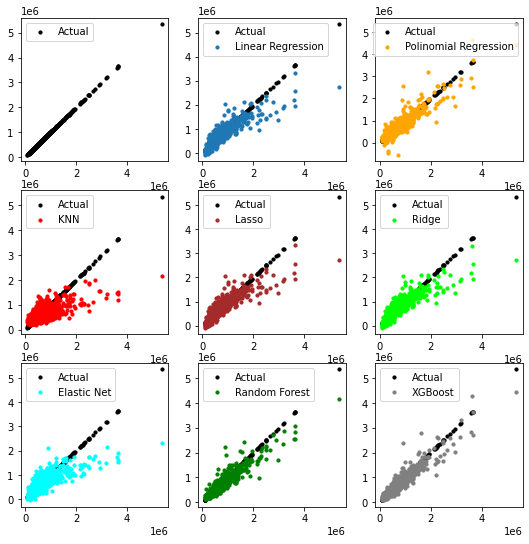

Comparation Scatterplot


In [195]:
plt.figure(figsize=(9, 9))

plt.subplot(3,3,1)
plt.scatter(y_test, y_test, s=10, color='black', label='Actual')
plt.legend(loc = 0)

plt.subplot(3,3,2)
plt.scatter(y_test, y_test, s=10, color='black', label='Actual')
plt.scatter(y_test, y_pred_lints_tuned, s=10, label='Linear Regression')
plt.legend(loc = 0)

plt.subplot(3,3,3)
plt.scatter(y_test, y_test, s=10, color='black', label='Actual')
plt.scatter(y_test, y_pred_polits_tuned, s=10, color='orange', label='Polinomial Regression')
plt.legend(loc = 0)

plt.subplot(3,3,4)
plt.scatter(y_test, y_test, s=10, color='black', label='Actual')
plt.scatter(y_test, y_pred_knnts_tuned, s=10, color='red', label='KNN')
plt.legend(loc = 0)

plt.subplot(3,3,5)
plt.scatter(y_test, y_test, s=10, color='black', label='Actual')
plt.scatter(y_test, y_pred_lassots_tuned, s=10, color='brown', label='Lasso')
plt.legend(loc = 0)

plt.subplot(3,3,6)
plt.scatter(y_test, y_test, s=10, color='black', label='Actual')
plt.scatter(y_test, y_pred_ridgets_tuned, s=10, color='lime', label='Ridge')
plt.legend(loc = 0)

plt.subplot(3,3,7)
plt.scatter(y_test, y_test, s=10, color='black', label='Actual')
plt.scatter(y_test, y_pred_ENts_tuned, s=10, color='cyan', label='Elastic Net')
plt.legend(loc = 0)

plt.subplot(3,3,8)
plt.scatter(y_test, y_test, s=10, color='black', label='Actual')
plt.scatter(y_test, y_pred_RFts_tuned, s=10, color='green', label='Random Forest')
plt.legend(loc = 0)

plt.subplot(3,3,9)
plt.scatter(y_test, y_test, s=10, color='black', label='Actual')
plt.scatter(y_test, y_pred_XGBts_tuned, s=10, color='grey', label='XGBoost')
plt.legend(loc = 0)

plt.show()

print('Comparation Scatterplot')